In [21]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [22]:
# img = cv2.imread("blob_cone.jpg")
img = cv2.imread("full_orange.jpg")

RGB to HSV

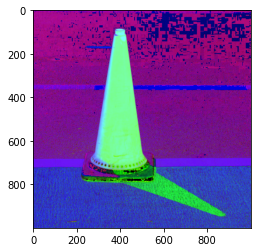

In [23]:
img_HSV = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
plt.imshow(img_HSV)
plt.show()

METHOD 1: <br>
RGB to HSV <br>
FIND contours <br>
PLOT rectangle

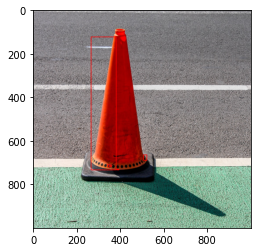

In [29]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# get the orange range
orange = cv2.inRange(hsv,(0, 100, 20), (25, 200, 255))

# # erode and then dilate
# kernel = np.ones((5, 5))
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# blur
orange = cv2.medianBlur(orange, 5)

# create result image
result = img.copy()

# find contours in orange image 
contours = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

# per contour create a rectangle
for cntr in contours:
    # rectangle size
    x,y,w,h = cv2.boundingRect(cntr)
    
    # check for minimum size
    if np.abs(y-x) > 2 and np.abs(h-w) > 2:
        # create rectangle
        cv2.rectangle(result, (x, y), (x+w, y+h), (0, 0, 255), 2)
        # print("x,y,w,h:",x,y,w,h)


# cv2.imshow("Keypoints", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

RGB_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_result)

METHOD 2: <br>
RGB to HSV <br>
FIND contours <br>
store all minimum rectangles <br>
Plot one big rectangle around them 



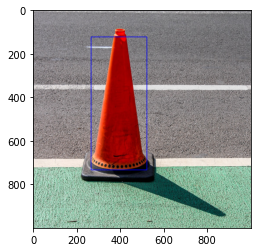

In [28]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# get the orange range
orange = cv2.inRange(hsv,(0, 100, 20), (25, 200, 255))

# # erode and then dilate
# kernel = np.ones((5, 5))
# mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# blur
orange = cv2.medianBlur(orange, 5)

# create result image
result = img.copy()

# find contours in orange image 
contours = cv2.findContours(orange, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

boxes = []
for c in contours:
    (x, y, w, h) = cv2.boundingRect(c)
    if np.abs(y-x) > 2 and np.abs(h-w) > 2:
        boxes.append([x,y, x+w,y+h])

result = img.copy()
boxes = np.asarray(boxes)
left, top = np.min(boxes, axis=0)[:2]
right, bottom = np.max(boxes, axis=0)[2:]

cv2.rectangle(result, (left,top), (right,bottom), (255, 0, 0), 2)
    
    

# cv2.imshow("Keypoints", result)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

RGB_result = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_result)